# Stochastic Calculus Problem Set I: Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part (a)

In [2]:
def brownian_motion(N, L):
    steps = np.random.choice([-1, 1], size=[L, N-1], p=[1/2, 1/2])
    symmetric_walk = np.hstack([np.zeros((L, 1)), steps.cumsum(axis=1)])
    denom = np.sqrt(np.tile(np.array(range(1, N + 1)), [L, 1]))
    brownian = symmetric_walk / denom
    return brownian

## Part (b)

In [3]:
# There is no such thing as "infinity" so I just use 99999.
# Actually, there's np.inf, but the datatypes don't play nicely and ugh.
INFINITY = 99999

In [4]:
def first_passage_time(paths, level):
    # np.argmax stops at the first occurence of True
    if level >= 0:
        crossings = np.argmax(paths > level, axis=1)
    else:
        crossings = np.argmax(paths < level, axis=1)
    passage_times = crossings - 1  # Remain within level
    passage_times[passage_times == -1] = INFINITY
    return passage_times

In [5]:
def reflect_path(path, point, level):
    out = path.squeeze()
    out[point + 1:] = 2*level - out[point + 1:]
    return np.atleast_2d(out)

## Part (c)

In [6]:
motions = brownian_motion(N=100000, L=1000)
levels = [0.5, 1, 2]

In [7]:
# P(tau_m > 1)
[np.mean(first_passage_time(motions, m) > 1) for m in levels]

[0.482, 0.745, 1.0]

In [8]:
# P(tau_m | tau_m <= 1)
lst = []
for m in levels:
    taus = first_passage_time(motions, m)
    lst.append(np.mean(taus[taus <= 1]))
    
lst

/Users/george/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/george/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.0, 1.0, nan]

## Part (d)

In [9]:
motions = brownian_motion(N=100000, L=3)

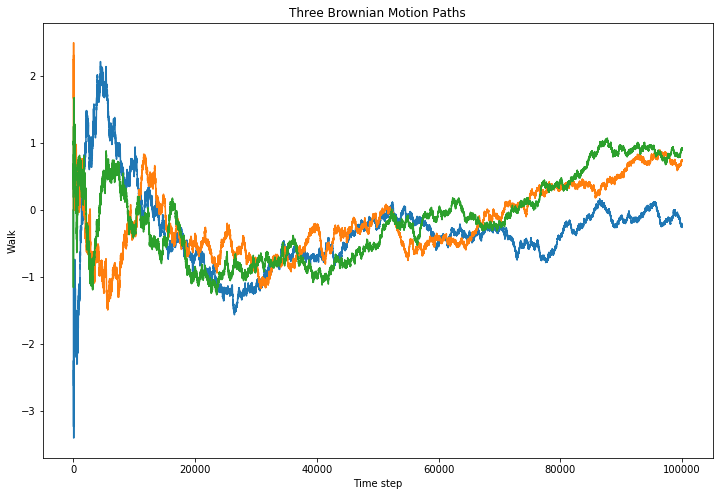

In [10]:
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(motions.T)
ax.set_xlabel('Time step')
ax.set_ylabel('Walk')
ax.set_title('Three Brownian Motion Paths');

## Part (e)

In [11]:
motions = []
first_passage_times = []
num_reflections = []

for _ in range(1000):
    motion = brownian_motion(N=100000, L=1)
    top_crossing = first_passage_time(motion, 1).item()
    bottom_crossing = first_passage_time(motion, -1).item()
    first_pass = min(top_crossing, bottom_crossing)
    num_refl = 0

    while (top_crossing != INFINITY) or (bottom_crossing != INFINITY):
        if top_crossing < bottom_crossing:
            motion = reflect_path(motion, top_crossing, 1)
        else:
            motion = reflect_path(motion, bottom_crossing, -1)
        
        num_refl += 1
        top_crossing = first_passage_time(motion, 1).item()
        bottom_crossing = first_passage_time(motion, -1).item()
    
    motions.append(np.squeeze(motion))
    first_passage_times.append(first_pass)
    num_reflections.append(num_refl)

motions = np.vstack(motions)

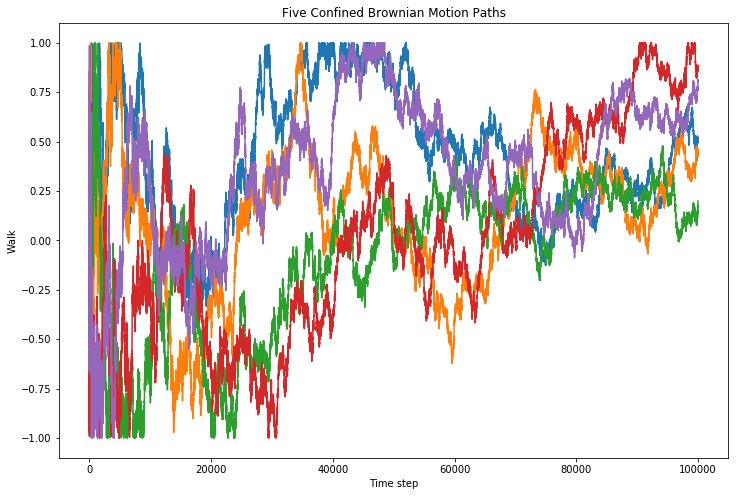

In [12]:
fig, ax = plt.subplots(figsize=[12, 8])
plt.plot(motions[:5, :].T)
ax.set_xlabel('Time step')
ax.set_ylabel('Walk')
ax.set_title('Five Confined Brownian Motion Paths');

In [13]:
# Mean first passage time
first_passage_times = np.array(first_passage_times)
np.mean(first_passage_times[first_passage_times != INFINITY])

41.518

In [14]:
# Mean number of reflections
np.mean(num_reflections)

302.921

In [15]:
# Probability that a path stays within the range
# My computer hangs if I generate 10e5 independent paths
# so I'm just doing 10e3. Sorry.

motions = brownian_motion(N=100000, L=1000)
np.mean(((motions >= -1) & (motions <= 1)).all(axis=1))

0.0